<a href="https://colab.research.google.com/github/Nuthan03/NN_Regression/blob/main/neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Regression with TensorFlow

There are many definitions for a [regression problem](https://en.wikipedia.org/wiki/Regression_analysis) but in our case, we're going to simplify it to be: predicting a number.

For example, you might want to:
- Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
- Predict the coordinates of a bounding box of an item in an image.
- Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.

In [85]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.14.0


## Creating data to view and fit

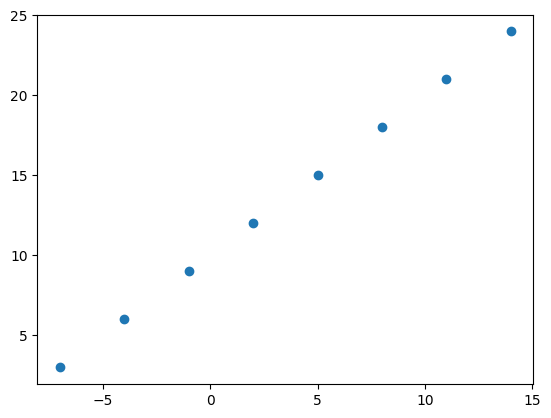

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0 , -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,Y);

In [87]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shape

In [88]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "batroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'batroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [89]:
# Turn our numpy arrays into tensors

X = tf.constant(X)
Y = tf.constant(Y)
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [90]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape , output_shape

(TensorShape([]), TensorShape([]))

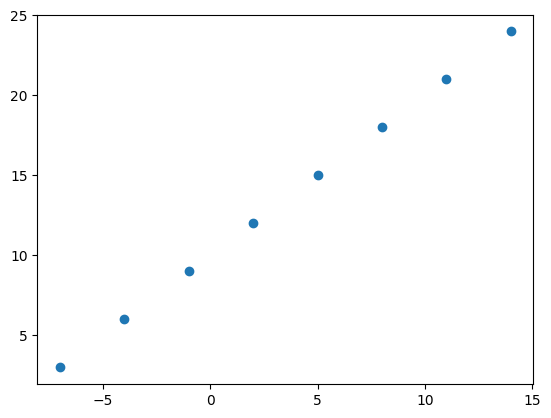

In [91]:
plt.scatter(X,Y)

## Steps in modelling with TensorFlow

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - Define the input and output layers, as well as the hidden layers of a deep learning model ,piece together the layers of a neural network yourself (using the [Functional](https://www.tensorflow.org/guide/keras/functional) or [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`).

In [92]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model =tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 357ms/step - loss: 17.7021 - mae: 17.7021
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 17.4209 - mae: 17.4209
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 17.1396 - mae: 17.1396
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 16.8584 - mae: 16.8584
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 16.5771 - mae: 16.5771


In [93]:
# Check out X and Y
X , Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [94]:
# Try and make a prediction using our model
y_preds = model.predict([17.0])
y_preds

1/1 [==============================] - 0s 66ms/step


array([[-11.535419]], dtype=float32)

## Improving the model

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).



In [95]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 348ms/step - loss: 12.6864 - mae: 12.6864
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.5539 - mae: 12.5539
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.4214 - mae: 12.4214
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 12.2889 - mae: 12.2889
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 12.1564 - mae: 12.1564
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 12.0239 - mae: 12.0239
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.8914 - mae: 11.8914
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 11.7589 - mae: 11.7589
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 11.6264 - mae: 11.6264
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 11.4939 - mae: 11.4939
Epoch 11/100
1/1 [==============================

In [96]:
X , Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [97]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 108ms/step


array([[29.796743]], dtype=float32)

In [98]:
# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 788ms/step - loss: 13.8589 - mae: 13.8589
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 13.7801 - mae: 13.7801
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 13.7013 - mae: 13.7013
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 13.6227 - mae: 13.6227
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 13.5446 - mae: 13.5446
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 13.4666 - mae: 13.4666
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 13.3886 - mae: 13.3886
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 13.3107 - mae: 13.3107
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 13.2328 - mae: 13.2328
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 13.1550 - mae: 13.1550
Epoch 11/100
1/1 [==============================] 

In [99]:
# Look at the data
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [100]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 127ms/step


array([[20.727634]], dtype=float32)

## Evaluating a model
A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

### Visualize, visualize, visualize

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?


In [101]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [102]:
# Make labels for the dataset
Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

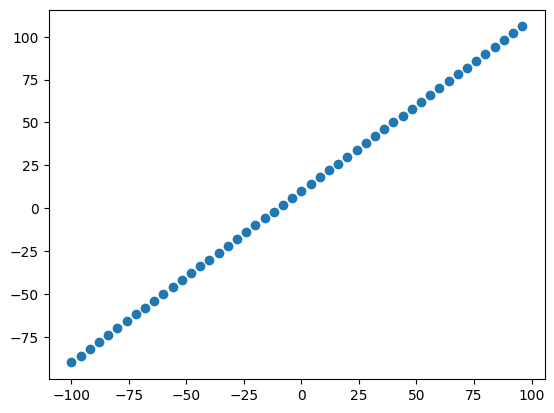

In [103]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, Y)

## Split data into training/test set

Each set serves a specific purpose:
* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

In [104]:
# Check the length of how many samples we have
len(X)

50

In [105]:
# Split the data into train and test sets
X_train = X[:40]
Y_train = Y[:40]

X_test = X[40:]
Y_test = Y[40:]

len(X_train), len(X_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our training and test data, it's a good idea to visualize it.

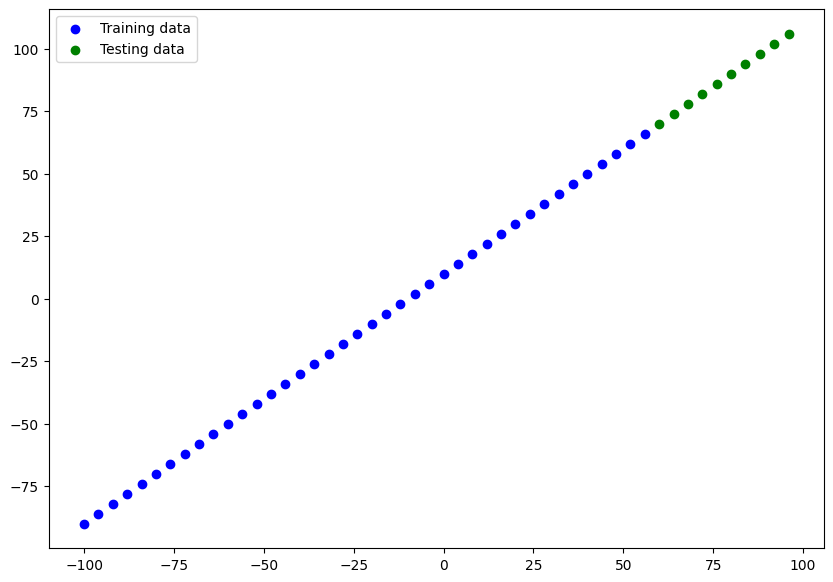

In [106]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train, Y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, Y_test, c="g", label="Testing data")
# Show the legend
plt.legend();

In [107]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
#model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

## Visualizing the model

In [108]:
model.summary()

ValueError: ignored

In [110]:
# Let's create a model which builds automatically by defining the input_shape
tf.random.set_seed(42)

 # Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
 ], name="model_1")

 # 2. Compile the model

model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

In [111]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during **transfer learning**).

In [112]:
# Let's fit our model to the training data
model.fit(X_train, Y_train, epochs=100, verbose=0)

In [113]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


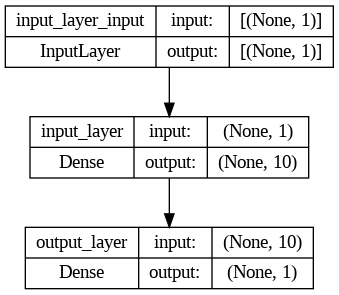

In [114]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

## Visualizing the predictions

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` vs. `y_pred` (ground truth vs. predictions).

In [115]:
# Make some predictions
Y_preds = model.predict(X_test)
Y_preds

1/1 [==============================] - 0s 76ms/step


array([[ 90.90146 ],
       [ 96.83856 ],
       [102.775665],
       [108.71278 ],
       [114.6499  ],
       [120.587006],
       [126.524124],
       [132.46124 ],
       [138.39835 ],
       [144.33545 ]], dtype=float32)

In [116]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [117]:
# Lets create a plotting function

def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=Y_preds):

  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the prediction in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

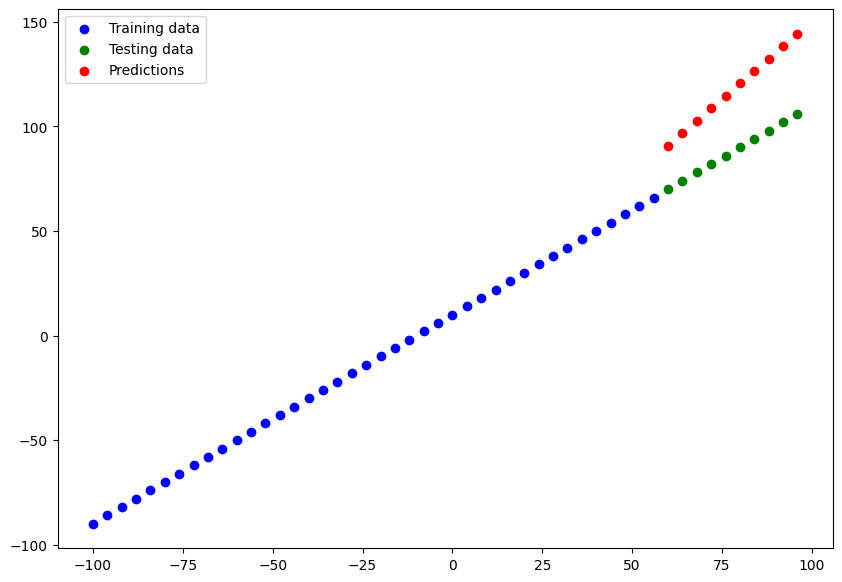

In [118]:
plot_predictions(train_data=X_train,
                 train_labels=Y_train,
                 test_data=X_test,
                 test_labels=Y_test,
                 predictions=Y_preds)

### Evaluating our model's predictions with regressions evaluation metrics

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:
* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).


In [119]:
# Evaluate the model on the test
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 163ms/step - loss: 29.6185 - mae: 29.6185


[29.618457794189453, 29.618457794189453]

In [120]:
# Calculate the mean absolute error

mae = tf.metrics.mean_absolute_error(y_true = Y_test,
                                    y_pred = tf.constant(Y_preds))

mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10.180292, 11.935425, 15.420532, 20.712784, 26.649902, 32.587006,
       38.524124, 44.461243, 50.398346, 56.33545 ], dtype=float32)>

In [121]:
tf.constant(Y_preds)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 90.90146 ],
       [ 96.83856 ],
       [102.775665],
       [108.71278 ],
       [114.6499  ],
       [120.587006],
       [126.524124],
       [132.46124 ],
       [138.39835 ],
       [144.33545 ]], dtype=float32)>

In [122]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [123]:
tf.squeeze(Y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 90.90146 ,  96.83856 , 102.775665, 108.71278 , 114.6499  ,
       120.587006, 126.524124, 132.46124 , 138.39835 , 144.33545 ],
      dtype=float32)>

In [124]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=Y_test,
                                     y_pred=tf.squeeze(Y_preds))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=29.618454>

In [125]:
# Calculate the mean square error

mse = tf.metrics.mean_squared_error(y_true=Y_test,
                                    y_pred=tf.squeeze(Y_preds))

mse

<tf.Tensor: shape=(), dtype=float32, numpy=908.21014>

In [126]:
# Make some functions to use MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.


In [127]:
X_train, Y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [128]:
# Set the random seed
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 16ms/step - loss: 16.6289 - mae: 16.6289
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 11.9492 - mae: 11.9492
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1049 - mae: 11.1049
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.3013 - mae: 9.3013
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1702 - mae: 10.1702
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4326 - mae: 9.4326
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.5724 - mae: 8.5724
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0447 - mae: 9.0447
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 18.7558 - mae: 18.7558
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 10.1168 - mae: 10.1168
Epoch 11/100
2/2 [==============================] - 0s 7ms/step -

1/1 [==============================] - 0s 44ms/step


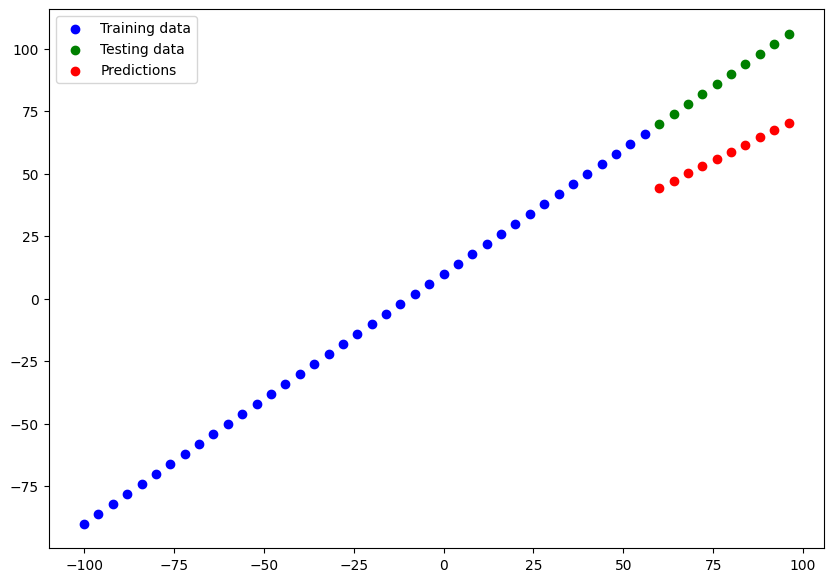

In [129]:
# Make and plot model_1
Y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=Y_preds_1)

In [130]:
# CAlculate model_1 evaluation metrics
mae_1 = mae(Y_test, Y_preds_1)
mse_1 = mse(Y_test, Y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.625492>,
 <tf.Tensor: shape=(), dtype=float32, numpy=948.34894>)

In [131]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 46.9672 - mae: 46.9672
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 25.7631 - mae: 25.7631
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 29.5244 - mae: 29.5244
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 16.2122 - mae: 16.2122
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 22.4132 - mae: 22.4132
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0380 - mae: 11.0380
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.0727 - mae: 12.0727
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 10.9277 - mae: 10.9277
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 38.0025 - mae: 38.0025
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 25.5912 - mae: 25.5912
Epoch 11/100
2/2 [==============================] - 0s 6ms

1/1 [==============================] - 0s 53ms/step


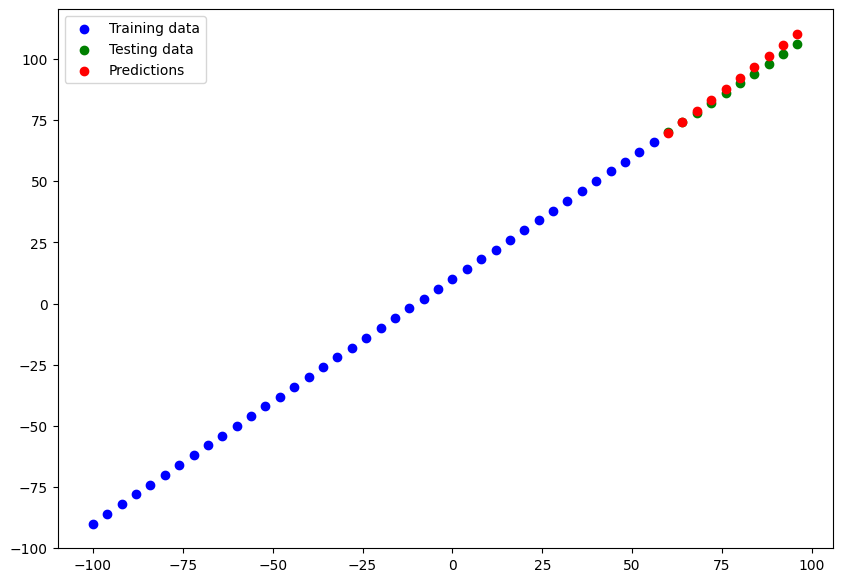

In [132]:
Y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=Y_preds_2)

In [133]:
mae_2 = mae(Y_test, Y_preds_2)
mse_2 = mse(Y_test, Y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=1.9769776>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.80118>)

In [134]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 10ms/step - loss: 62.3050 - mae: 62.3050
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 20.3932 - mae: 20.3932
Epoch 3/500
2/2 [==============================] - 0s 11ms/step - loss: 17.9757 - mae: 17.9757
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 13.1894 - mae: 13.1894
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 14.5147 - mae: 14.5147
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 11.5734 - mae: 11.5734
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 12.6191 - mae: 12.6191
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 11.0209 - mae: 11.0209
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 39.4891 - mae: 39.4891
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 27.0074 - mae: 27.0074
Epoch 11/500
2/2 [==============================] - 0s 8m

1/1 [==============================] - 0s 89ms/step


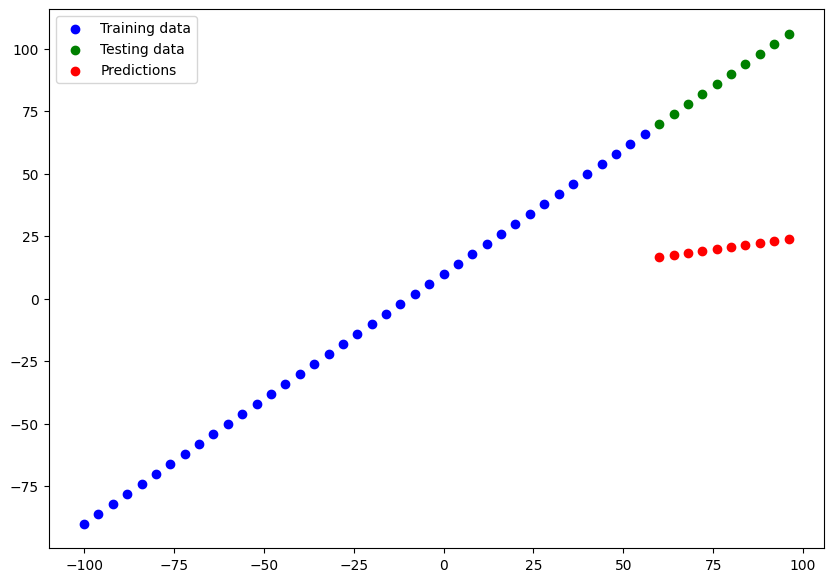

In [135]:
Y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=Y_preds_3)

In [136]:
mae_3 = mae(Y_test, Y_preds_3)
mse_3 = mse(Y_test, Y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.59789>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4653.454>)

### Comparing the results

In [137]:
# Let's compare our model's result's using pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.625492,948.348938
1,model_2,1.976978,5.801180
2,model_3,67.597893,4653.454102


In [138]:
model_2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                20        
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Saving the model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

In [139]:
# save model using the SaveModel format
model_2.save("Best_model_SavedModel_format")

In [140]:
# Save model using HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading a saved model

In [141]:
# Load in the saved model
loaded_SavedModel_format = tf.keras.models.load_model("/content/Best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                20        
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [142]:
model_2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                20        
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [143]:
# Compare model_2 predictions with SavedModel format model
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 95ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A larger example

In [166]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [167]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [168]:
# One-Hot
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [181]:
# Create X and Y values
X = insurance_one_hot.drop("charges", axis=1)
Y = insurance_one_hot["charges"]

In [182]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [193]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

insurance_model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 6ms/step - loss: 9219.5986 - mae: 9219.5986
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 7875.5972 - mae: 7875.5972
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7562.5513 - mae: 7562.5513
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 7667.2295 - mae: 7667.2295
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 7646.5474 - mae: 7646.5474
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 7612.5566 - mae: 7612.5566
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 7591.7407 - mae: 7591.7407
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7764.1011 - mae: 7764.1011
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7489.9678 - mae: 7489.9678
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 7700.4766 - mae: 7700.4766

In [194]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8754.1602 - mae: 8754.1602


[8754.16015625, 8754.16015625]

In [186]:
Y_train.median(), Y_train.mean()

(9575.4421, 13346.089736364485)

Let's improve the model

In [195]:
tf.random.set_seed(42)

insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_1.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

insurance_model_1.fit(X_train, Y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13280.9121 - mae: 13280.9121
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13097.9844 - mae: 13097.9844
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12711.9434 - mae: 12711.9434
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11967.7939 - mae: 11967.7939
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10761.0605 - mae: 10761.0605
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9284.9199 - mae: 9284.9199
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8006.2036 - mae: 8006.2036
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7474.0215 - mae: 7474.0215
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7398.7607 - mae: 7398.7607
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7379.5596 - mae:

In [196]:
insurance_model_1.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4842.1138 - mae: 4842.1138


[4842.11376953125, 4842.11376953125]

In [197]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

history = insurance_model_2.fit(X_train, Y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13322.4561 - mae: 13322.4561
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13187.3564 - mae: 13187.3564
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12913.7207 - mae: 12913.7207
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12368.8594 - mae: 12368.8594
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11406.1328 - mae: 11406.1328
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 10023.3213 - mae: 10023.3213
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8563.4102 - mae: 8563.4102
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7648.7778 - mae: 7648.7778
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7439.1250 - mae: 7439.1250
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7413.1577 - ma

In [198]:
insurance_model_2.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3506.0815 - mae: 3506.0815


[3506.08154296875, 3506.08154296875]

Text(0.5, 0, 'epochs')

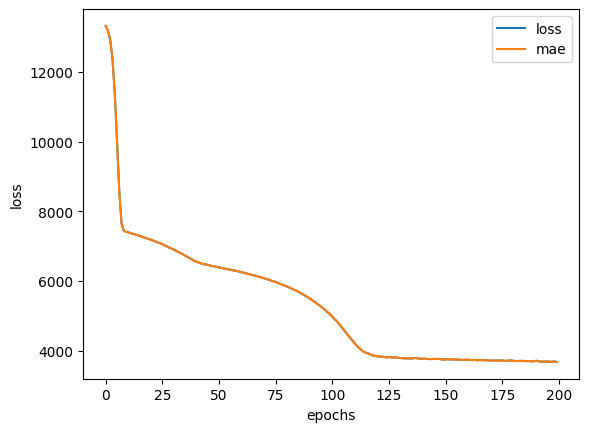

In [199]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing the data

<Axes: ylabel='Frequency'>

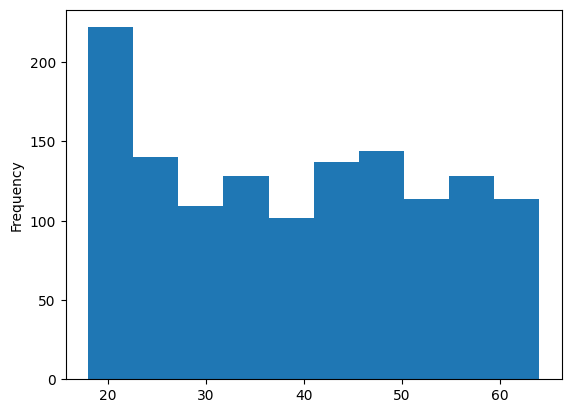

In [192]:
x["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

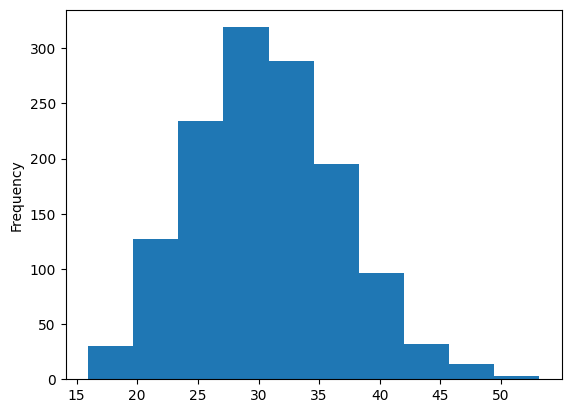

In [158]:
x["bmi"].plot(kind="hist")

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To do this, we're going to use a few classes from Scikit-Learn:
* [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) - build a multi-step data preprocessing function for the folllowing transformations:
  * [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) - make sure all numerical columns are normalized (between 0 and 1).
  * [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) - one hot encode the non-numerical columns.

In [160]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create x and y
x = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(x_train)

# Tansforme training and test data with normalization (MinMaxScaler) and OneHot encoding
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [161]:
# What does our data look like now ?
x_train.loc[0]


age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [162]:
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [163]:
x_train.shape, x_train_normal.shape

((1070, 6), (1070, 11))

In [201]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Fit
insurance_model_4.fit(x_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13298.0811 - mae: 13298.0811
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13124.7402 - mae: 13124.7402
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12766.2217 - mae: 12766.2217
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12067.3301 - mae: 12067.3301
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10892.4629 - mae: 10892.4629
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9394.1963 - mae: 9394.1963
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8063.4448 - mae: 8063.4448
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7481.6406 - mae: 7481.6406
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7396.8862 - mae: 7396.8862
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7376.8896 - mae:

In [202]:
# Evaluate the model
insurance_model_4.evaluate(x_test_normal, y_test)

9/9 [==============================] - 1s 14ms/step - loss: 15035.5088 - mae: 15035.5088


[15035.5087890625, 15035.5087890625]


## `note:` Normaliztion of the data wont get you the right answer all the time